In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.insert(0, os.getenv('SRC_PATH'))

import numpy as np
from src.volsurface import GridInterpVolSurface, KernelVolSurface

## Linear interpolation for linear model

In [2]:
rng = np.random.default_rng(42)
delta = rng.uniform(0, 1, 10000)
maturity = rng.uniform(0, 1, 10000)
vol = delta + maturity

X = np.column_stack([delta, maturity])
y = vol

model = GridInterpVolSurface(kx=1, ky=1)
model.fit(X, y)

pred = model.predict(np.array([[0.55, 1.05]]))[0]
print(f"Predicted vol: {pred:.4f}")

Predicted vol: 1.5731


<Axes3D: title={'center': 'Volatility Surface'}, xlabel='Delta', ylabel='Maturity', zlabel='Implied Volatility'>

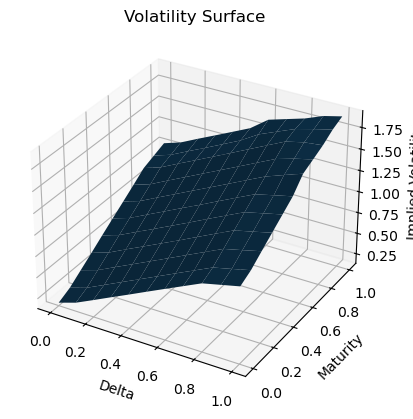

In [3]:
model.plot()

## Constant extrapolation

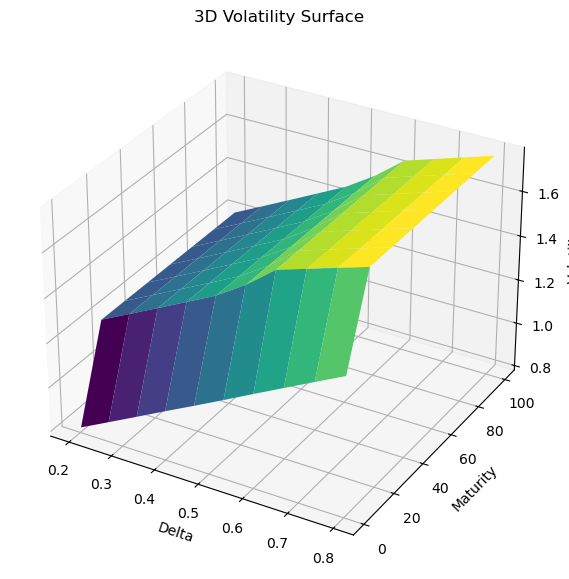

In [4]:
from mpl_toolkits.mplot3d import Axes3D

delta_grid = np.linspace(0.2, 0.8, 10)
maturity_grid = np.linspace(0.5, 100, 8)
grid_vol = model.predict_grid(delta_grid, maturity_grid)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

delta_grid_mesh, maturity_grid_mesh = np.meshgrid(delta_grid, maturity_grid, indexing='ij')
ax.plot_surface(delta_grid_mesh, maturity_grid_mesh, grid_vol, cmap='viridis')

ax.set_xlabel('Delta')
ax.set_ylabel('Maturity')
ax.set_zlabel('Volatility')
ax.set_title('3D Volatility Surface')

plt.show()

## Compare kernel and interpolation

In [23]:
rng = np.random.default_rng(42)
delta = rng.uniform(0, 1, 1000)
maturity = rng.uniform(0, 1, 1000)
vol = np.sin(delta * 2 * np.pi) + np.cos(maturity * 4 * np.pi) 
X = np.column_stack([delta, maturity])
y = vol

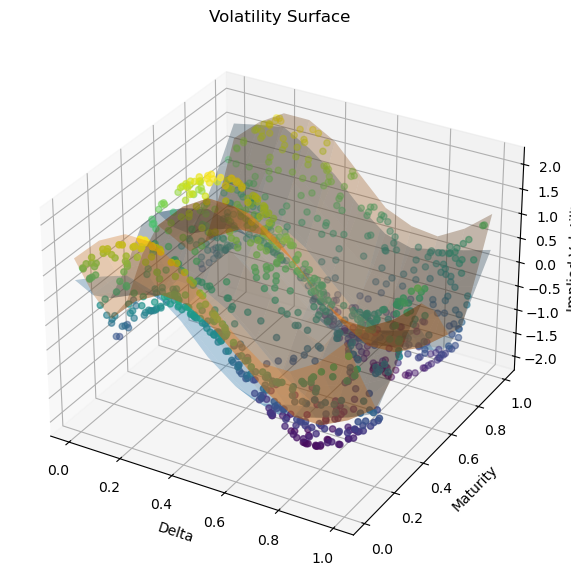

In [25]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(delta, maturity, vol, c=vol, cmap='viridis', marker='o')

ax.set_xlabel('Delta')
ax.set_ylabel('Maturity')
ax.set_zlabel('Volatility')
ax.set_title('3D Scatter Plot of Delta, Maturity, and Volatility')

interp_model_predictions = GridInterpVolSurface(kx=1, ky=1)
interp_model_predictions.fit(X, y)
interp_y_pred = interp_model_predictions.predict(X)

interp_model_predictions.plot(ax=ax, alpha=0.3)

kernel_model_predictions = KernelVolSurface()
kernel_model_predictions.fit(X, y)
kernel_y_pred = kernel_model_predictions.predict(X)

kernel_model_predictions.plot(ax=ax, alpha=0.3)

plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

mse_interp = mean_squared_error(y, interp_y_pred)
mse_kernel = mean_squared_error(y, kernel_y_pred)

print(f"MSE for Grid Interpolation Model: {mse_interp:.4f}")
print(f"MSE for Kernel Model: {mse_kernel:.4f}")

MSE for Grid Interpolation Model: 0.2602
MSE for Kernel Model: 0.0559
